In [1]:
import pandas as pd
import seaborn as sb


In [2]:
SapoData = pd.read_csv('housingLisbon/casa_sapo_550pages.csv')
SapoDict = pd.read_csv('housingLisbon/casa_sapo_Dictionary.csv')

In [3]:
#drop rows with empty values
SapoData = SapoData.dropna()
SapoDict = SapoDict.dropna()


In [4]:
Sapo = pd.DataFrame(columns=['title', 'price', 'area'])

In [5]:
Sapo = SapoDict['price'].str.split(' ,', expand=True).stack().reset_index().rename(columns={0:'price'}).drop(columns=['level_0', 'level_1'])




In [6]:
Sapo['title'] = SapoDict['title'].str.split('\r\n                    ,\r\n                        ', expand=True).stack().reset_index().drop(columns=['level_0','level_1'])


In [7]:
Sapo['area'] = SapoDict['area'].str.split('Condition,', expand=True).stack().reset_index().drop(columns=['level_0','level_1'])




In [8]:
Sapo['area'] = Sapo['area'].astype(str)

In [9]:
df = pd.DataFrame(Sapo['area'].str.split(',',6).tolist(), columns = ['Condition', 'NetArea1',
                                                                     'NetArea','FloorArea1',
                                                                     'FloorArea','ContructionArea1','ConstructionArea'])


In [10]:
df['NetArea'].loc[df['NetArea'] == '-'] = df['FloorArea']
df['NetArea'].loc[df['NetArea'] == ''] = df['FloorArea']


In [11]:
Sapo.head()

,price,title,area
0,"369,900",\r\n Apartment 2 Bedroo...,
1,"320,000","Apartment 2 Bedrooms, Penha de França, Lisboa","Refurbished,Net Area,85m²,Floor Area,95m²,Cons..."
2,"2,200,000","Apartment 4 Bedrooms, Restelo (São Francisco X...","Refurbished,Net Area,-,Floor Area,80m²,Constru..."
3,"1,650,000","Apartment 3 Bedrooms, Amoreiras, Campolide, Li...","New,Net Area,-,Floor Area,282m²,Construction A..."
4,"1,500,000","Apartment 4 Bedrooms, Páteo Bagatela (São Mame...","Under construction,Net Area,-,Floor Area,211m²..."


In [12]:
df.head()

,Condition,NetArea1,NetArea,FloorArea1,FloorArea,ContructionArea1,ConstructionArea
0,,None,None,None,None,None,None
1,Refurbished,Net Area,85m²,Floor Area,95m²,Construction Area,"-,"
2,Refurbished,Net Area,80m²,Floor Area,80m²,Construction Area,"-,"
3,New,Net Area,282m²,Floor Area,282m²,Construction Area,"-,"
4,Under construction,Net Area,211m²,Floor Area,211m²,Construction Area,"-,"


In [13]:
df = df.drop(columns=['NetArea1','FloorArea1','ContructionArea1', 'FloorArea', 'ConstructionArea'])

In [14]:
df = df.drop([0])

In [15]:
#split the listing title into appropriate columns
dfy = pd.DataFrame(Sapo['title'].str.split(',').tolist(), columns = ['Bedrooms', 'Neighborhood', 'Parish','City'])

In [16]:
dfy.loc[dfy['Parish'] == 'Lisboa','Parish'] = dfy['Neighborhood']

In [17]:
dfx = pd.DataFrame(dfy['Bedrooms'].str.split(' ',2).tolist(), columns = ['Type','NbrBedrooms','Bedroom'])


In [18]:
dfy = dfy.join(dfx)

In [19]:
dfy = dfy.drop(columns = ['Bedrooms'])

In [20]:
Sapo = Sapo.join(dfy)

In [21]:
Sapo = Sapo.join(df)

In [22]:
Sapo.head()

,price,title,area,Neighborhood,Parish,City,Type,NbrBedrooms,Bedroom,Condition,NetArea
0,"369,900",\r\n Apartment 2 Bedroo...,,Alvalade,Alvalade,Lisboa,\r\n,,Apartment 2 Bedrooms,NaN,NaN
1,"320,000","Apartment 2 Bedrooms, Penha de França, Lisboa","Refurbished,Net Area,85m²,Floor Area,95m²,Cons...",Penha de França,Lisboa,None,Apartment,2,Bedrooms,Refurbished,85m²
2,"2,200,000","Apartment 4 Bedrooms, Restelo (São Francisco X...","Refurbished,Net Area,-,Floor Area,80m²,Constru...",Restelo (São Francisco Xavier),Belém,Lisboa,Apartment,4,Bedrooms,Refurbished,80m²
3,"1,650,000","Apartment 3 Bedrooms, Amoreiras, Campolide, Li...","New,Net Area,-,Floor Area,282m²,Construction A...",Amoreiras,Campolide,Lisboa,Apartment,3,Bedrooms,New,282m²
4,"1,500,000","Apartment 4 Bedrooms, Páteo Bagatela (São Mame...","Under construction,Net Area,-,Floor Area,211m²...",Páteo Bagatela (São Mamede),Santo António,Lisboa,Apartment,4,Bedrooms,Under construction,211m²


In [23]:
Sapo = Sapo.drop(columns=['area'])
Sapo = Sapo.drop([0])

In [24]:
Sapo.to_csv('CasaSapoAppartments.csv')

# Houses

In [25]:
SapoHouses = pd.read_csv('housingLisbon/casa_sapo_DictionaryHouses.csv')

In [26]:
SapoHouz = pd.DataFrame(columns=['title', 'price', 'area'])

In [27]:
SapoHouz = SapoHouses['price'].str.split(' ,', expand=True).stack().reset_index().rename(columns={0:'price'}).drop(columns=['level_0', 'level_1'])


In [28]:
SapoHouz['title'] = SapoHouses['title'].str.split('\r\n                    ,\r\n                        ', expand=True).stack().reset_index().drop(columns=['level_0','level_1'])

In [29]:
SapoHouz['area'] = SapoHouses['area'].str.split('Condition,', expand=True).stack().reset_index().drop(columns=['level_0','level_1'])


In [30]:
SapoHouz['area'] = SapoHouz['area'].astype(str)

In [31]:
#df1['NetArea'].loc[df1['NetArea'] == '-'] = df1['FloorArea']

In [32]:
SapoHouz.head()

,price,title,area
0,"1,500,000","\r\n House 5 Bedrooms, ...",
1,"6,300,000","House 7 Bedrooms, Alvalade, Alvalade, Lisboa","Used,Net Area,-,Floor Area,300m²,Construction ..."
2,"/ 25,000","House 4 Bedrooms +2, Restelo (Santa Maria de B...","Used,Net Area,680m²,Floor Area,800m²,Construct..."
3,"2,480,000","House 4 Bedrooms +1, Paço do Lumiar, Lumiar, L...","Remodelled,Net Area,317m²,Floor Area,-,Constru..."
4,"1,522,257","Semi-Detached House 2 Bedrooms + 1, Campolide,...","New,Net Area,548m²,Floor Area,-,Construction A..."


In [33]:
df1 = pd.DataFrame(SapoHouz['area'].str.split(',',6).tolist(), columns = ['Condition', 'NetArea1',
                                                                     'NetArea','FloorArea1',
                                                                     'FloorArea','ContructionArea1','ConstructionArea'])


In [34]:
df1['NetArea'].loc[df1['NetArea'] == '-'] = df1['FloorArea']
df1['NetArea'].loc[df1['NetArea'] == ''] = df1['FloorArea']


In [35]:
df1 = df1.drop([0])
df1 = df1.drop(columns=['NetArea1','FloorArea1','ContructionArea1', 'FloorArea', 'ConstructionArea'])
dfyz = pd.DataFrame(SapoHouz['title'].str.split(',').tolist(), columns = ['Bedrooms', 'Neighborhood', 'Parish','City'])
dfxz = pd.DataFrame(dfyz['Bedrooms'].str.split(' ',2).tolist(), columns = ['Type','NbrBedrooms','Bedroom'])

dfyz = dfyz.join(dfxz)
dfyz = dfyz.join(df1)
dfyz = dfyz.drop(columns = ['Bedrooms'])
dfyz.head()


In [43]:
SapoHouz = SapoHouz.join(dfyz)
SapoHouz = SapoHouz.drop(columns=['area'])
SapoHouz = SapoHouz.drop([0])
SapoHouz.head()


In [46]:
SapoHouz.to_csv('CasaSapoHouses.csv')

In [49]:
SapoAll = Sapo.append(SapoHouz)

In [50]:
SapoAll = SapoAll.reset_index()
SapoAll = SapoAll.drop(columns = ['index'])
SapoAll = SapoAll.drop_duplicates()
SapoAll = SapoAll.drop(columns = ['title', 'Bedroom'])
SapoAll['City'] = 'Lisbon'
SapoAll.to_csv('CasaSapo_AllProperty.csv')


In [55]:
SapoAll.loc[SapoAll['Parish'] == ' Lisboa','Parish'] = SapoAll['Neighborhood']
SapoAll.loc[SapoAll['Parish'] == ' Lisboa\r\n                    ','Parish'] = SapoAll['Neighborhood']
SapoAll = SapoAll.loc[SapoAll['Type'] != '\r\n']



In [58]:
SapoAll = SapoAll.loc[SapoAll['NbrBedrooms'] != 'floor']

In [59]:
SapoAll = SapoAll.loc[SapoAll['NbrBedrooms'] != 'Floor']

In [60]:
SapoAll = SapoAll.loc[SapoAll['NbrBedrooms'] != 'House']


In [61]:
SapoAll = SapoAll.loc[SapoAll['NbrBedrooms'] != 'No']

In [62]:
SapoAll = SapoAll.loc[SapoAll['NbrBedrooms'] != None]

In [63]:
SapoAll.loc[SapoAll['NbrBedrooms'] == 'Studio', 'NbrBedrooms'] = '0'

In [67]:
SapoAll['price'] =SapoAll['price'].str.replace(',','')
SapoAll['price'] =SapoAll['price'].str.replace('/','')

In [68]:
SapoAll['price'] =SapoAll['price'].str.replace('/','')

In [69]:
SapoAll.to_csv('SapoDataSetCleaned.csv')

In [71]:
SapoAll = SapoAll[SapoAll['price'].apply(lambda x: len(x)>=5)]

In [72]:
SapoAll.to_csv('SapoDataSetCleaned.csv')

In [73]:
SapoAll['price'] = pd.to_numeric(SapoAll.price,errors='coerce')

In [74]:
SapoAll.dtypes

price           float64
Neighborhood     object
Parish           object
City             object
Type             object
NbrBedrooms      object
Condition        object
NetArea          object
dtype: object

In [75]:
SapoAll.to_csv('SapoDataSetCleaned.csv')

## Bringing it all together

In [168]:
df = pd.read_csv('SapoDataSetCleaned.csv')

In [169]:
df.head()

,Unnamed: 0,price,Neighborhood,Parish,City,Type,NbrBedrooms,Condition,NetArea
0,0,320000.0,Penha de França,Penha de França,Lisbon,Apartment,2.0,Refurbished,85m²
1,1,2200000.0,Restelo (São Francisco Xavier),Belém,Lisbon,Apartment,4.0,Refurbished,80m²
2,2,1650000.0,Amoreiras,Campolide,Lisbon,Apartment,3.0,New,282m²
3,3,1500000.0,Páteo Bagatela (São Mamede),Santo António,Lisbon,Apartment,4.0,Under construction,211m²
4,4,350000.0,Campolide,Campolide,Lisbon,Apartment,3.0,Used,225m²


In [170]:
df['Parish'].unique()

array([' Penha de França', ' Belém', ' Campolide', ' Santo António',
       ' Alvalade', ' Benfica', ' Avenidas Novas',
       ' São Domingos de Benfica', ' Misericórdia', ' Areeiro',
       ' Santa Maria Maior', ' Olivais', ' Arroios', ' São Vicente',
       ' Estrela', ' Beato', ' Parque das Nações', ' Campo de Ourique',
       ' Lumiar', ' Marvila', ' Alcântara', ' Ajuda', ' Santa Clara',
       ' Carnide', ' Parque das Naç��es', ' S��o Domingos de Benfica'],
      dtype=object)

In [171]:
df['Parish'] = df['Parish'].str[1:]


In [176]:
df['Parish'].loc[df['Parish'] == 'S��o Domingos de Benfica'] = 'São Domingos de Benfica'
df['Parish'].loc[df['Parish'] == 'Parque das Naç��es'] = 'Parque das Nações'

In [177]:
df.loc[df['Parish'] == 'Parque das Naç��es']

,Unnamed: 0,price,Neighborhood,Parish,City,Type,NbrBedrooms,Condition,NetArea


In [178]:
df = df.dropna(axis = 0).reset_index()
df = df.drop(columns=['index', 'Unnamed: 0'])

In [179]:
#removing all listings with over 6 bedrooms
df = df.loc[df['NbrBedrooms'] < 6]

df['NbrBedrooms'] = df['NbrBedrooms'].astype(int)
df['price'] = df['price'].astype(int)

#remove the 'm**2' from NetArea
df['NetArea'] = df['NetArea'].str[:-2]

empty = df.loc[df['NetArea'] =='']
df = df.drop(empty.index, axis = 0)

In [183]:
df.head()

,price,Neighborhood,Parish,City,Type,NbrBedrooms,Condition,NetArea
0,320000,Penha de França,Penha de França,Lisbon,Apartment,2,Refurbished,85
1,2200000,Restelo (São Francisco Xavier),Belém,Lisbon,Apartment,4,Refurbished,80
2,1650000,Amoreiras,Campolide,Lisbon,Apartment,3,New,282
3,1500000,Páteo Bagatela (São Mamede),Santo António,Lisbon,Apartment,4,Under construction,211
4,350000,Campolide,Campolide,Lisbon,Apartment,3,Used,225


In [184]:
df['Condition'].value_counts()

Used                                         9669
New                                          4326
Under construction                           3555
Refurbished                                  2985
Remodelled                                   1567
For refurbishment                             741
In project                                    215
Not Applicable                                 57
To demolish or rebuild                          4
With Incentive Program for Rehabilitation       1
Name: Condition, dtype: int64

In [185]:
df_used = df.loc[df['Condition']=='Used']
df_new = df.loc[df['Condition']=='New']
df_constr = df.loc[df['Condition']=='Under construction']
df_refur = df.loc[df['Condition']=='Refurbished']

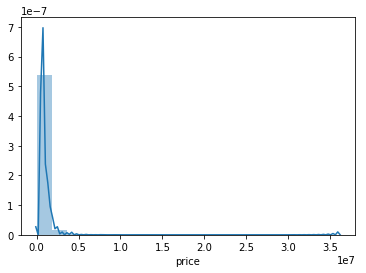

In [186]:
sb.distplot(df_used['price'], bins =20)

In [187]:
df['NetArea'].loc[df['NetArea']=='38m'] = 38

In [188]:
df['NetArea'].unique()

In [189]:
df['NetArea'] = df['NetArea'].astype(int)

In [190]:
#show price in 100's K
df['price'] = df['price'] / 1000

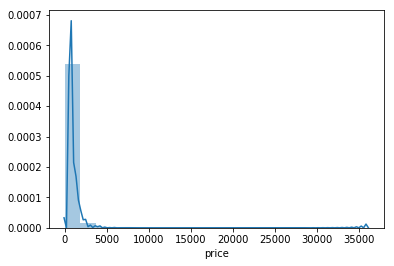

In [191]:
sb.distplot(df['price'], bins =20)

In [192]:
#remove all listings above 1 million euros
df_adjustedPrice = df.loc[df['price'] < 1000]

In [200]:
df.Parish.unique()

array(['Penha de França', 'Belém', 'Campolide', 'Santo António',
       'Benfica', 'Avenidas Novas', 'São Domingos de Benfica',
       'Misericórdia', 'Areeiro', 'Santa Maria Maior', 'Olivais',
       'Arroios', 'São Vicente', 'Estrela', 'Beato', 'Parque das Nações',
       'Alvalade', 'Lumiar', 'Marvila', 'Alcântara', 'Campo de Ourique',
       'Ajuda', 'Santa Clara', 'Carnide'], dtype=object)

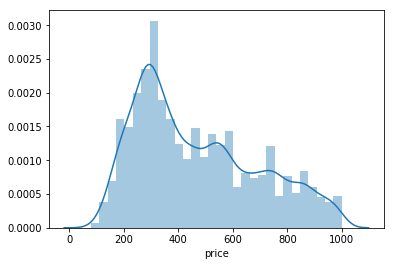

In [193]:
sb.distplot(df_adjustedPrice['price'], bins =30)

In [194]:
df_adjustedPrice.head()

,price,Neighborhood,Parish,City,Type,NbrBedrooms,Condition,NetArea
0,320.0,Penha de França,Penha de França,Lisbon,Apartment,2,Refurbished,85
4,350.0,Campolide,Campolide,Lisbon,Apartment,3,Used,225
5,277.5,Charquinho,Benfica,Lisbon,Apartment,3,New,186
6,830.0,Amoreiras,Campolide,Lisbon,Apartment,2,Refurbished,89
7,299.9,Fonte Nova,Benfica,Lisbon,Apartment,3,Under construction,115


In [201]:
#FINAL DISTRIBUTION FILE
df_adjustedPrice.to_csv('SapoDistData.csv')

In [195]:
df_adjustedPrice['PriceSqM'] = df_adjustedPrice['price'] / df_adjustedPrice['NetArea']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [196]:
avg_price_PerSqm = df_adjustedPrice.groupby(['NbrBedrooms', 'Parish']).mean()
avg_price_PerSqm = avg_price_PerSqm.round({'price': 2, 'NetArea': 0, 'PriceSqM': 2})

In [197]:
#FINAL HOUSING FILE WITH PRICE?SQUARE METER
avg_price_PerSqm.to_csv('avg_price_PerSqm_SAPO.csv')